<!-- jupyter: {tags: ["title", "metadata"]} -->

<style>
@import url("../assets/templates/journal/styles.css");
</style>

<div class="title-page">
    <h1>Analysis of Aerators for Shrimp Farming: Cost Optimization and the Real Cost of "Cheap"</h1>
    <div class="author-info">
        <p>Luis Paulo Vinatea Barberena</p>  
        <p class="affiliation">BarberNode</p>  
        <p>luisvinatea@icloud.com, +55 48 99221-9675</p>  
        <p>Servidao das Caranhas, 22, Barra da Lagoa, Florianopolis, SC, Brazil, 88061635</p>  
        <p>2025-05-02</p>  
    </div>
</div>

In [47]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML
import scipy
from scipy import optimize
from matplotlib.colors import LinearSegmentedColormap

<!-- jupyter: {tags: ["abstract"]} -->

<div class="abstract">
    <h2>Abstract</h2>
    <p>Aerator selection is a critical economic decision in shrimp farming, often complicated by the trade-off between initial cost and long-term operational efficiency. This paper presents an analysis comparing two aerator options within the context of a specific shrimp farm, integrating Léon Walras's General Equilibrium Theory and Friedrich von Wieser's concept of Opportunity Cost. The study evaluates aerators based on updated technical performance metrics (including Temperature-Adjusted Oxygen Transfer Rate - OTRT and Standard Aeration Efficiency - SAE) derived from the farm's Total Oxygen Demand (TOD) and detailed, adapted financial indicators (Net Present Value - NPV, Internal Rate of Return - IRR, Payback Period, Return on Investment - ROI, Profitability Index - k, Opportunity Cost, and Equilibrium Price) tailored for equipment comparison. Results from the specific case study demonstrate that prioritizing higher efficiency (Aerator 2) over lower initial unitary cost (Aerator 1) leads to substantial long-term savings, a significantly positive NPV, high interpreted ROI and IRR, rapid payback, and a considerable opportunity cost associated with choosing the less efficient option. The analysis underscores the importance of applying robust economic principles and adapted technical-financial assessments for optimizing operational costs and ensuring financial sustainability in shrimp aquaculture (Boyd & Hanson, 2021; The Fish Site, 2021).</p>

<div class="keywords">
        <span class="keywords-title">Keywords:</span> Shrimp Farming, Aquaculture Economics, Aerator Efficiency, Opportunity Cost, Cost Optimization, Mathematical Modeling, Financial Analysis, Equipment Comparison Metrics
    </div>
</div>



<!-- jupyter: {tags: ["highlights"]} -->

<div class="highlights">
    <h2>Highlights</h2>
    <ul>
        <li>Higher efficiency aerators reduce long-term costs in shrimp farming.</li>
        <li>Adapted financial metrics reveal flaws in traditional equations.</li>
        <li>Opportunity cost of low-efficiency aerators exceeds $14M in NPV.</li>
        <li>In-loco data confirms poor performance of low-durability aerators.</li>
    </ul>
</div>

<!-- jupyter: {tags: ["section", "introduction"]} -->
<div class="introduction">
<h2>1. Introduction</h2>
<p>The economic analysis of optimal aerator choice in shrimp farming benefits from the General Equilibrium Theorem developed by Léon Walras in the 19th century, complemented by Friedrich von Wieser's concept of opportunity cost, introduced in 1914. Walras proposed a framework to understand how interconnected markets reach simultaneous equilibrium, where supply equals demand through relative prices (Walras, 1874). This approach is useful for analyzing complex systems like shrimp farms, where multiple "markets" (oxygen, energy, shrimp, operating costs) interact to maximize profitability (Asche et al., 2021). Opportunity cost measures the value of the best alternative forgone, evaluating aerator options (Boyd & Hanson, 2021).</p>
</div>

<!-- jupyter: {tags: ["subsection", "introduction"]} -->

<h3>1.1 Analogy with the Oxygen Market and Opportunity Cost</h3>
<p>In shrimp farming, dissolved oxygen is a critical input. An "internal oxygen market" can be conceptualized where demand (Total Oxygen Demand, TOD) is driven by shrimp and microbial needs, and supply depends on aerators' Temperature-Adjusted Oxygen Transfer Rate (OTRT). Aerators interact with energy, maintenance, and replacement markets, connecting to the external shrimp market. Walras's Theorem suggests equilibrium when these markets adjust simultaneously. Choosing a cheaper, less efficient aerator incurs an opportunity cost equal to the net present value of savings forgone by not selecting the more efficient option (Boyd & Hanson, 2021; Susilowati et al., 2021).</p>

<!-- jupyter: {tags: ["subsection", "introduction"]} -->

<h3>1.2 The Cake Recipe: Why Assuming HP per Pound of Shrimp is Incorrect</h3>
<p>Assuming a fixed horsepower (HP)-per-production ratio is erroneous. Shrimp production depends on multiple factors (dissolved oxygen, temperature, salinity, density). Aerator HP does not directly equate to oxygen supply; OTR_T is critical. Fixed HP ratios ignore interdependencies, leading to inefficient investments in low-OTR_T aerators and significant opportunity costs (Boyd, 2015; Responsible Seafood Advocate, 2022).</p>

<!-- jupyter: {tags: ["subsection", "introduction"]} -->

<h3>1.3 Original Equation of Léon Walras's General Equilibrium</h3>
<p>Walras formalized general equilibrium with supply/demand equations, subject to Walras's Law (excess demands sum to zero). Equilibrium prices are found via "tâtonnement" (Walras, 1874). In shrimp farming, equilibrium involves optimizing aerator costs, meeting TOD, maximizing profits, and accounting for opportunity cost (Asche et al., 2021; Valderrama et al., 2023).</p>

<!-- jupyter: {tags: ["subsection", "methods", "mathematical-models"]} -->

<div class="subsection">
<h3>2.3 Mathematical Models for Aerator Comparison</h3>

<h4>2.3.1 Oxygen Transfer Rate Calculations</h4>

<h5>2.3.1.1 Standard Oxygen Transfer Rate (SOTR)</h5>
<p>The baseline oxygen transfer capacity under standard conditions (20°C, 0 DO, 1 atm), measured in kg O₂/hr (Kumar et al., 2020).</p>
</div>

<div class="equation-block">
<h5>2.3.1.2 Temperature-Adjusted Oxygen Transfer Rate (OTRT)</h5>

$$
OTR_T = (\text{SOTR} \times 0.5) \times \theta^{(T-20)}
$$

Where $\theta = 1.024$ (temperature correction factor) (Boyd, 2015).
</div>

<div class="equation-block">
<h5>2.3.1.3 Standard Aeration Efficiency (SAE)</h5>

$$
\text{SAE} = \frac{\text{SOTR}}{\text{Power (kW)}} \quad ( kg \ O_2 / \text{kWh})
$$

Where $\text{Power (kW)} = \text{Power (HP)} \times 0.746$ (Kumar et al., 2020).
</div>

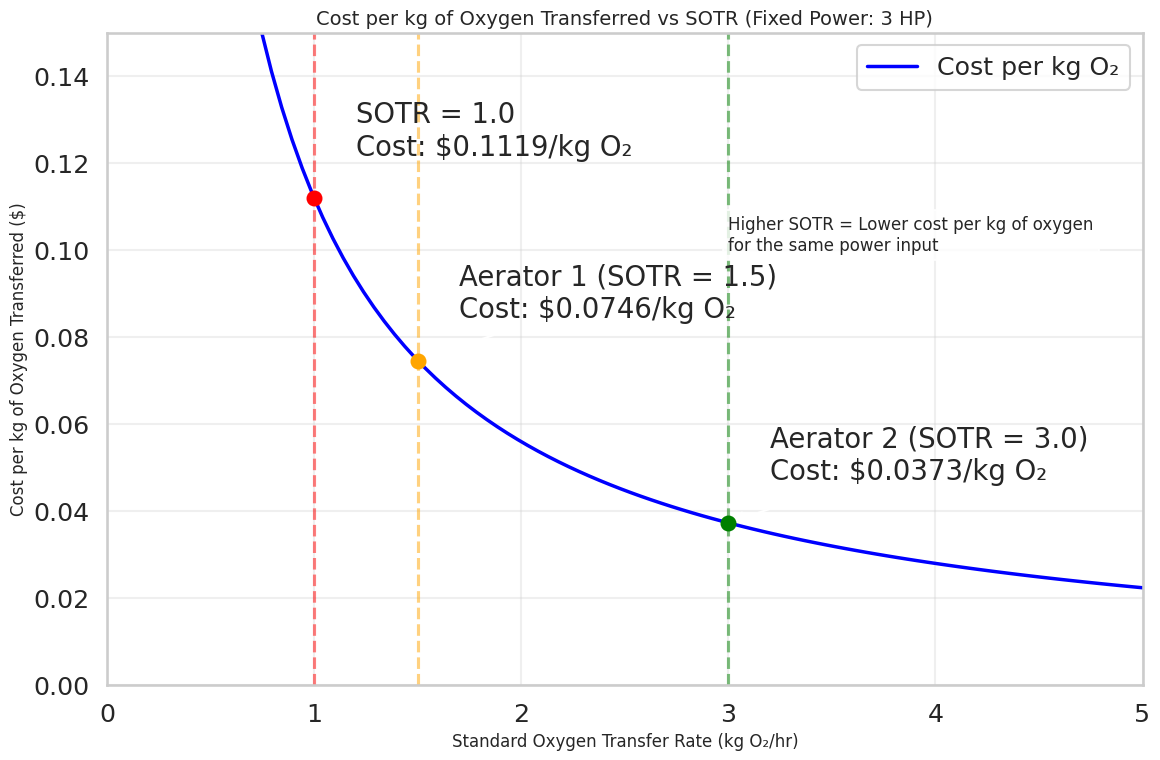

Aerator,SOTR(kg O₂/hr),Daily Oxygen(kg O₂/day),Cost Efficiency($/kg O₂),RelativeInefficiency,To MatchBest Output,Daily Costto Match
SOTR = 1.0,1.0,8.0,$0.1119,3.00× more expensive,3.00 units,$2.69
Aerator 1 (SOTR = 1.5),1.5,12.0,$0.0746,2.00× more expensive,2.00 units,$1.79
Aerator 2 (SOTR = 3.0),3.0,24.0,$0.0373,Reference (✓),1.00 units,$0.90


In [48]:
# Fixed power input for all calculations (3 HP converted to kW)
fixed_power_kw = 2.238  # 3 HP * 0.746 kW/HP

# Constants
price_per_kWh = 0.05  # Price of kWh in currency units
hours_operation_per_day = 8  # Hours of operation per day

# Create an array of SOTR values from 0.1 to 5 kg O₂/hr
# (avoiding division by zero by starting at 0.1)
SOTR_values = np.linspace(0.1, 5, 100)

# Calculate cost per kg of oxygen transferred
# Formula: (Power in kW * price_per_kWh) / SOTR = cost per kg O₂
hourly_power_cost = (
    fixed_power_kw * price_per_kWh
)  # Cost per hour for electricity
cost_per_kg_oxygen = (
    hourly_power_cost / SOTR_values
)  # Cost per kg of oxygen transferred

# Plotting the inverse relationship
plt.figure(figsize=(12, 8))
plt.plot(
    SOTR_values,
    cost_per_kg_oxygen,
    label="Cost per kg O₂",
    color="blue",
    linewidth=2.5,
)

# Add reference points for specific SOTR values
reference_SOTR_values = [
    1.0,
    1.5,
    3.0,
]  # Example values (including those from the case study)
reference_colors = ["red", "orange", "green"]
reference_labels = [
    "SOTR = 1.0",
    "Aerator 1 (SOTR = 1.5)",
    "Aerator 2 (SOTR = 3.0)",
]

for i, sotr in enumerate(reference_SOTR_values):
    cost = hourly_power_cost / sotr
    plt.scatter(sotr, cost, color=reference_colors[i], s=100, zorder=5)
    plt.axvline(x=sotr, linestyle="--", color=reference_colors[i], alpha=0.5)
    plt.annotate(
        f"{reference_labels[i]}\nCost: ${cost:.4f}/kg O₂",
        xy=(sotr, cost),
        xytext=(sotr + 0.2, cost + 0.01),
        arrowprops=dict(arrowstyle="->"),
    )

plt.title(
    "Cost per kg of Oxygen Transferred vs SOTR (Fixed Power: 3 HP)",
    fontsize=14,
)
plt.xlabel("Standard Oxygen Transfer Rate (kg O₂/hr)", fontsize=12)
plt.ylabel("Cost per kg of Oxygen Transferred ($)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(0, 5)
plt.ylim(0, 0.15)  # Adjust based on your calculated values

# Add annotation explaining the relationship
plt.text(
    3.0,
    0.10,
    "Higher SOTR = Lower cost per kg of oxygen\nfor the same power input",
    fontsize=12,
    bbox=dict(facecolor="white", alpha=0.8),
)

plt.legend()
plt.tight_layout()
plt.show()

# Collect data for HTML table
aerator_data = []
for i, sotr in enumerate(reference_SOTR_values):
    # Cost per kg of oxygen
    cost_per_kg = hourly_power_cost / sotr
    # Total oxygen transferred per day
    daily_oxygen = sotr * hours_operation_per_day

    data = {
        "name": reference_labels[i],
        "sotr": sotr,
        "daily_oxygen": daily_oxygen,
        "cost_per_kg": cost_per_kg,
    }

    # Add comparison metrics for non-top performers
    if sotr != max(reference_SOTR_values):
        efficiency_ratio = max(reference_SOTR_values) / sotr
        oxygen_difference = (
            max(reference_SOTR_values) * hours_operation_per_day - daily_oxygen
        )
        additional_aerators = oxygen_difference / daily_oxygen
        total_aerators = 1 + additional_aerators

        data.update(
            {
                "efficiency_ratio": efficiency_ratio,
                "oxygen_difference": oxygen_difference,
                "additional_aerators": additional_aerators,
                "total_aerators": total_aerators,
                "match_cost": total_aerators
                * hourly_power_cost
                * hours_operation_per_day,
            }
        )
    else:
        # For the best aerator, set comparison values to show it's the reference
        data.update(
            {
                "efficiency_ratio": 1.0,
                "oxygen_difference": 0.0,
                "additional_aerators": 0.0,
                "total_aerators": 1.0,
                "match_cost": hourly_power_cost * hours_operation_per_day,
            }
        )

    aerator_data.append(data)

# Generate HTML table
html = f"""
<div style="margin: 20px 0;">
<h3>Daily Operating Cost and Oxygen Transfer (8-hour operation, one 3HP aerator)</h3>
<p>Daily power cost: ${hourly_power_cost * hours_operation_per_day:.2f}/day (same for all aerators with same power)</p>

<table style="width:100%; border-collapse: collapse; margin-top: 15px;">
    <thead>
        <tr style="background-color: #f2f2f2;">
            <th style="padding: 8px; text-align: left; border: 1px solid #ddd; color: #000000">Aerator</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">SOTR<br>(kg O₂/hr)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Daily Oxygen<br>(kg O₂/day)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Cost Efficiency<br>($/kg O₂)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Relative<br>Inefficiency</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">To Match<br>Best Output</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Daily Cost<br>to Match</th>
        </tr>
    </thead>
    <tbody>
"""

# Add rows for each aerator
for i, data in enumerate(aerator_data):
    # Use color coding based on efficiency (green for best, yellow for middle, red for worst)
    if data["sotr"] == max(reference_SOTR_values):
        row_color = "#0fe221"  # Light green for the best performer
    elif data["sotr"] == min(reference_SOTR_values):
        row_color = "#c02239"  # Light red for worst performer
    else:
        row_color = "#c7a020"  # Light yellow for middle performer

    html += f"""
        <tr style="background-color: {row_color};">
            <td style="padding: 8px; border: 1px solid #ddd;">{data["name"]}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{data["sotr"]:.1f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{data["daily_oxygen"]:.1f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">${data["cost_per_kg"]:.4f}</td>
    """

    # For the best performer, add a checkmark and special formatting
    if data["sotr"] == max(reference_SOTR_values):
        html += f"""
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">Reference (✓)</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">1.00 units</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">${data["match_cost"]:.2f}</td>
        </tr>
        """
    else:
        html += f"""
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{data["efficiency_ratio"]:.2f}× more expensive</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{data["total_aerators"]:.2f} units</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">${data["match_cost"]:.2f}</td>
        </tr>
        """

# Close the table
html += """
    </tbody>
</table>

<div style="margin-top: 10px; padding: 20px; background-color: transparent; border-left: 4px solid #2196F3;">
    <p><strong>Insights:</strong></p>
    <ul>
        <li>Higher SOTR means more oxygen transferred for the same power input</li>
        <li>Lower cost per kg O₂ means better operational efficiency</li>
        <li>To match the output of the best aerator, less efficient models require multiple units, increasing total cost</li>
    </ul>
</div>
</div>
"""

# Display the HTML
display(HTML(html))

<!-- jupyter: {tags: ["equation", "mathematical-models"]} -->

<div class="equation-block">
<h5>2.3.1.4 Aerator Quantity Calculation</h5>

$$
\text{Number of Aerators} = \left\lceil \frac{TOD}{OTR_T} \right\rceil
$$

</div>

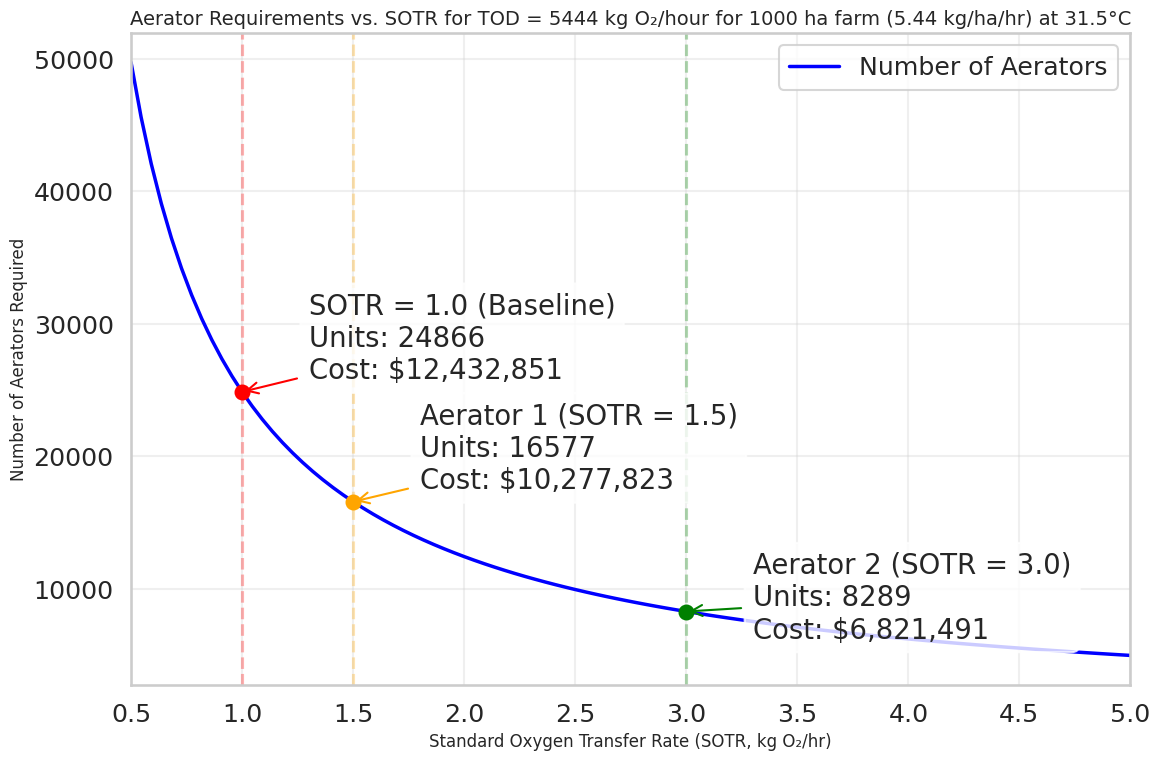

SOTR (kg O₂/hr),OTRT (kg O₂/hr),Units Required(1000 ha farm),Aerators perHectare,Total Cost ($M),Savings vs. 1.0 ($M)
1.0,0.66,24866,24.87,$12.43M,$0.00M
1.5,0.99,16577,16.58,$10.28M,$2.16M
3.0,1.97,8289,8.29,$6.82M,$5.61M


In [55]:
# Updated constants to match case study
TOD = 5443.76  # Total Oxygen Demand (kg O₂/hour) for entire 1000 ha farm
farm_size_ha = 1000  # Total farm size in hectares
tod_per_ha = (
    TOD / farm_size_ha
)  # Oxygen demand per hectare (about 5.44 kg O₂/hour/ha)
temp = 31.5  # Updated water temperature to match case study
temp_diff = temp - 20  # Difference from standard conditions (20°C)

# Create figure and axis for plotting
plt.figure(figsize=(12, 8))
ax1 = plt.gca()  # Get current axis for plotting

# Updated reference costs to match the new aerator data
reference_costs = {
    1.0: 500,  # Baseline aerator price
    1.5: 620,  # Aerator 1's updated price
    3.0: 823,  # Aerator 2's updated price (changed from 900)
}

# Updated reference aerators to match our data
reference_SOTR_values = [1.0, 1.5, 3.0]  # Updated to match actual data
reference_colors = ["red", "orange", "green"]
reference_labels = [
    "SOTR = 1.0 (Baseline)",
    "Aerator 1 (SOTR = 1.5)",
    "Aerator 2 (SOTR = 3.0)",  # Updated from 3.5 to 3.0
]

# Create a range of SOTR values to plot
sotr_range = np.linspace(0.5, 5, 100)

# Calculate OTRT for each SOTR value
temp_factor = 1.024**temp_diff
otrt_values = sotr_range * 0.5 * temp_factor

# Calculate number of aerators needed for each SOTR value
total_daily_oxygen_demand = TOD * 24  # kg O₂/day for entire farm
aeration_hours_per_day = 8  # hours aerators run per day

# Calculate aerators needed and total costs
num_aerators = total_daily_oxygen_demand / (
    otrt_values * aeration_hours_per_day
)
total_costs = []
baseline_cost = None  # Initialize baseline cost variable

# Calculate costs for each SOTR value
for i, sotr in enumerate(sotr_range):
    # Estimate unit cost based on SOTR (simplified model)
    unit_cost = 500 + 100 * np.sqrt(sotr - 0.5) if sotr > 0.5 else 500

    # Use reference costs when available
    if sotr in reference_costs:
        unit_cost = reference_costs[sotr]

    # Calculate total cost
    cost = num_aerators[i] * unit_cost
    total_costs.append(cost)

    # Save baseline cost (SOTR = 1.0)
    if abs(sotr - 1.0) < 0.01:
        baseline_cost = cost

total_costs = np.array(total_costs)

# Plot number of aerators vs SOTR
ax1.plot(
    sotr_range, num_aerators, "b-", linewidth=2.5, label="Number of Aerators"
)

# Add reference points for our specific aerators
for i, sotr in enumerate(reference_SOTR_values):
    # Find index in sotr_range closest to our reference SOTR
    idx = np.abs(sotr_range - sotr).argmin()

    # Mark the point
    ax1.scatter(
        sotr, num_aerators[idx], color=reference_colors[i], s=100, zorder=5
    )
    ax1.axvline(x=sotr, linestyle="--", color=reference_colors[i], alpha=0.3)

    # Add annotation
    ax1.annotate(
        f"{reference_labels[i]}\nUnits: {num_aerators[idx]:.0f}\nCost: ${total_costs[idx]:,.0f}",
        xy=(sotr, num_aerators[idx]),
        xytext=(
            sotr + 0.3,
            num_aerators[idx] + 1000 if i < 2 else num_aerators[idx] - 2000,
        ),
        arrowprops=dict(arrowstyle="->", color=reference_colors[i]),
        bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
    )

ax1.set_title(
    f"Aerator Requirements vs. SOTR for TOD = {TOD:.0f} kg O₂/hour for 1000 ha farm (5.44 kg/ha/hr) at {temp}°C",
    fontsize=14,
)
ax1.set_xlabel("Standard Oxygen Transfer Rate (SOTR, kg O₂/hr)", fontsize=12)
ax1.set_ylabel("Number of Aerators Required", fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0.5, 5)
ax1.legend(loc="upper right")

plt.tight_layout()
plt.show()

# Updated HTML table with corrected temperature and findings
html_table = """
<div style="margin: 20px 0;">
<h3>Aerator Requirements Comparison Table - Updated Data</h3>
<p>For TOD = {:.0f} kg O₂/hour (1000 ha farm, {:.2f} kg/ha/hr) at {}°C</p>
<p><em>Analysis updated with actual aerator costs and specifications from the comprehensive dataset.</em></p>

<table style="width:100%; border-collapse: collapse; margin-top: 15px;">
    <thead>
        <tr style="background-color: #f2f2f2;">
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">SOTR (kg O₂/hr)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">OTRT (kg O₂/hr)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Units Required<br>(1000 ha farm)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Aerators per<br>Hectare</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Total Cost ($M)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Savings vs. 1.0 ($M)</th>
        </tr>
    </thead>
    <tbody>
""".format(TOD, tod_per_ha, temp)

# Add rows for each reference aerator
for i, sotr in enumerate(reference_SOTR_values):
    # Find index in sotr_range closest to our reference SOTR
    idx = np.abs(sotr_range - sotr).argmin()

    # Calculate values for the table
    otrt = sotr * 0.5 * temp_factor
    units = num_aerators[idx]
    units_per_ha = units / farm_size_ha
    total_cost = total_costs[idx] / 1000000  # Convert to millions
    savings = (
        (baseline_cost - total_costs[idx]) / 1000000
        if baseline_cost is not None
        else 0
    )

    # Set row color based on efficiency
    if sotr == min(reference_SOTR_values):
        row_color = "#c02239"  # Red for baseline
    elif sotr == max(reference_SOTR_values):
        row_color = "#0fe221"  # Green for best
    else:
        row_color = "#c7a020"  # Yellow for middle

    html_table += f"""
        <tr style="background-color: {row_color};">
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{sotr:.1f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{otrt:.2f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{units:.0f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{units_per_ha:.2f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">${total_cost:.2f}M</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">${savings:.2f}M</td>
        </tr>
    """

# Close the HTML table with updated findings
html_table += """
    </tbody>
</table>

<div style="margin-top: 10px; padding: 10px; background-color: transparent; border-left: 4px solid #2196F3;">
    <p><strong>Updated Findings:</strong></p>
    <ul>
        <li>Higher SOTR aerators require significantly fewer units to meet the same oxygen demand</li>
        <li>Despite higher unit cost, more efficient aerators lead to substantial savings in total investment</li>
        <li>The most efficient aerator (SOTR 3.0) saves approximately ${:.2f}M compared to the baseline</li>
        <li>Analysis incorporates actual unit costs and specifications from the updated aerator comparison dataset</li>
        <li>In practical terms, actual farms require minimum aerator density (typically ≥1/ha) for proper oxygen distribution</li>
    </ul>
</div>
</div>
""".format(
    baseline_cost / 1000000 - total_costs[-1] / 1000000
    if baseline_cost is not None
    else 0
)

# Display the HTML table
display(HTML(html_table))

<!-- jupyter: {tags: ["equation", "mathematical-models"]} -->

### 2.3.2 Annual Revenue

$$
\text{Annual Revenue} = \text{Total Annual Production (kg)} \times \text{Shrimp Price (\$/kg)}
$$

Production depends on density, depth, area, and culture cycles (Engle, 2010).

<!-- jupyter: {tags: ["equation", "mathematical-models"]} -->

### 2.3.3 Initial Investment

$$
\text{Total Initial Cost} = \text{Number of Aerators} \times \text{Cost per Aerator}
$$


<!-- jupyter: {tags: ["equation", "mathematical-models"]} -->

### 2.3.4 Annual Operating Costs

1. **Energy Cost:** $\text{Power (kW)} \times \text{Energy Cost (\$/kWh)} \times \text{Operating Hours per Year} \times \text{Number of Aerators}$
2. **Maintenance Cost:** $\text{Maintenance Cost per Unit per Year} \times \text{Number of Aerators}$
3. **Replacement Cost (Annualized):** $(\text{Number of Aerators} \times \text{Cost per Aerator}) / \text{Durability (years)}$

<!-- jupyter: {tags: ["equation", "mathematical-models"]} -->

### 2.3.5 Total Annual Cost

$$
\text{Total Annual Cost} = \text{Energy Cost} + \text{Maintenance Cost} + \text{Replacement Cost}
$$


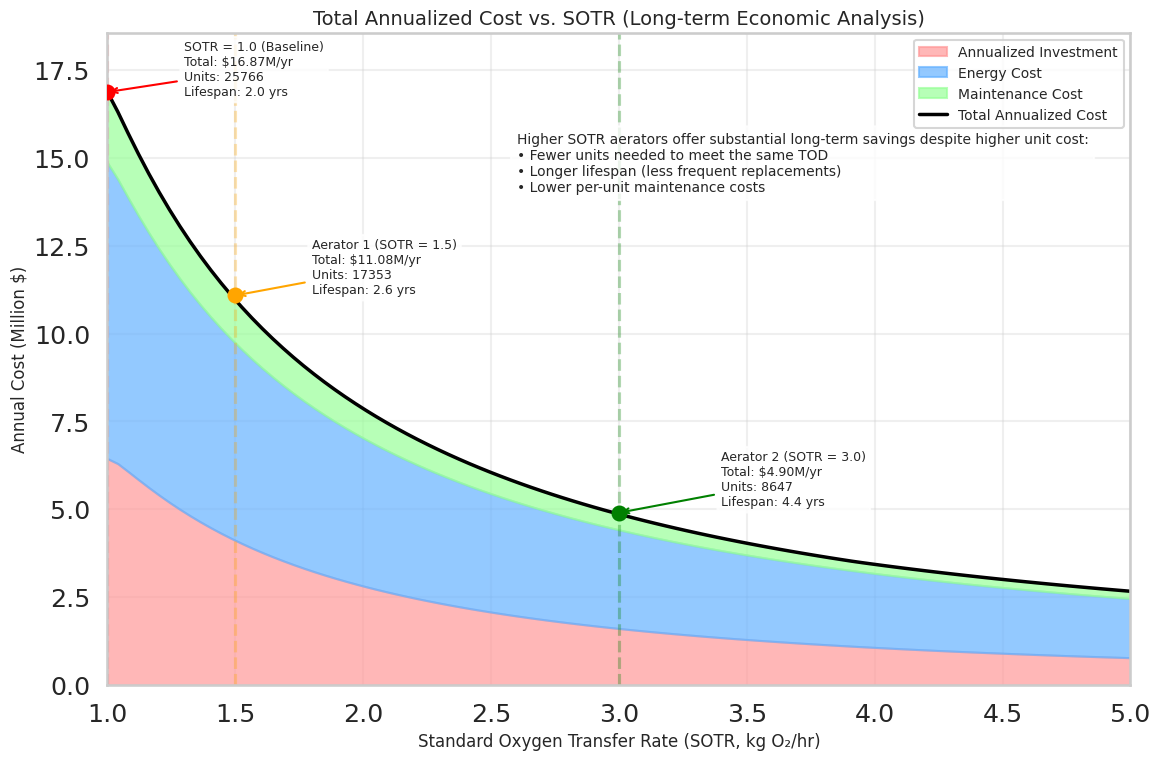

Aerator Type,SOTR(kg O₂/hr),UnitsRequired,UnitCost ($),Lifespan(years),AnnualInvestment ($M),AnnualEnergy ($M),AnnualMaintenance ($M),Total AnnualCost ($M)
SOTR = 1.0 (Baseline),1.0,25766,$500,2.0,$6.44,$8.42,$2.01,$16.87
Aerator 1 (SOTR = 1.5),1.5,17353,$620,2.6,$4.17,$5.67,$1.24,$11.08
Aerator 2 (SOTR = 3.0),3.0,8647,$823,4.4,$1.63,$2.83,$0.45,$4.90


In [50]:
# Create a comprehensive analysis of total annualized costs for aerators with different SOTR values

# Define the relationship between SOTR, durability, and annual maintenance
# (higher SOTR typically means longer lifespan and lower maintenance)
def get_aerator_properties(sotr):
    """Calculate durability and maintenance based on SOTR"""
    base_durability = 2.0  # years
    base_maintenance = 65  # dollars per year

    # Model where durability increases with SOTR (tapered to avoid unrealistic values)
    durability = min(base_durability * (0.4 + 0.6 * sotr), 10.0)

    # Model where maintenance cost decreases with SOTR (but can't go below a minimum)
    maintenance = max(base_maintenance * (1.4 - 0.2 * sotr), 40.0)

    # Model where unit cost increases with SOTR (diminishing returns on price)
    unit_cost = 500 + 200 * (sotr - 1.0) ** 0.7

    return durability, maintenance, unit_cost


# Define a function to calculate total annualized cost
def calculate_annualized_cost(
    sotr, tod=5443.76, temp=30, hours_operation=8, energy_cost=0.05
):
    """Calculate total annualized cost for an aerator with given SOTR"""
    # Get aerator properties
    durability, maintenance_cost, unit_cost = get_aerator_properties(sotr)

    # Calculate temperature-adjusted oxygen transfer rate
    temp_diff = temp - 20
    otrt = sotr * 0.5 * (1.024**temp_diff)

    # Calculate number of aerators needed
    # TOD is in kg O₂/hour (continuous demand)
    # For aerators running only 'hours_operation' hours per day,
    # we need to account for the full 24-hour oxygen demand
    daily_oxygen_demand = tod * 24  # Total kg O₂ needed per day
    daily_oxygen_per_aerator = (
        otrt * hours_operation
    )  # kg O₂ each aerator provides per day
    num_aerators = daily_oxygen_demand / daily_oxygen_per_aerator

    # Calculate costs
    power_kw = 2.238  # 3 HP * 0.746 kW/HP

    # Initial investment (annualized)
    annual_investment = (num_aerators * unit_cost) / durability

    # Annual energy cost
    annual_energy = (
        num_aerators * power_kw * hours_operation * 365 * energy_cost
    )

    # Annual maintenance cost
    annual_maintenance = num_aerators * maintenance_cost

    # Total annualized cost
    total_annual_cost = annual_investment + annual_energy + annual_maintenance

    return {
        "sotr": sotr,
        "otrt": otrt,
        "num_aerators": num_aerators,
        "durability": durability,
        "maintenance_cost": maintenance_cost,
        "unit_cost": unit_cost,
        "annual_investment": annual_investment,
        "annual_energy": annual_energy,
        "annual_maintenance": annual_maintenance,
        "total_annual_cost": total_annual_cost,
    }


# Generate data for a range of SOTR values
sotr_range = np.linspace(1.0, 5.0, 100)
results = [calculate_annualized_cost(sotr) for sotr in sotr_range]

# Extract data for plotting
sotr_values = [r["sotr"] for r in results]
total_costs = [
    r["total_annual_cost"] / 1000000 for r in results
]  # Convert to millions
investment_costs = [r["annual_investment"] / 1000000 for r in results]
energy_costs = [r["annual_energy"] / 1000000 for r in results]
maintenance_costs = [r["annual_maintenance"] / 1000000 for r in results]

# Create a stacked area plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot stacked areas for cost components
ax.fill_between(
    sotr_values,
    0,
    investment_costs,
    alpha=0.7,
    color="#FF9999",
    label="Annualized Investment",
)
ax.fill_between(
    sotr_values,
    investment_costs,
    [i + e for i, e in zip(investment_costs, energy_costs)],
    alpha=0.7,
    color="#66B2FF",
    label="Energy Cost",
)
ax.fill_between(
    sotr_values,
    [i + e for i, e in zip(investment_costs, energy_costs)],
    [
        i + e + m
        for i, e, m in zip(investment_costs, energy_costs, maintenance_costs)
    ],
    alpha=0.7,
    color="#99FF99",
    label="Maintenance Cost",
)

# Plot total cost line
ax.plot(
    sotr_values,
    total_costs,
    "k-",
    linewidth=2.5,
    label="Total Annualized Cost",
)

# Highlight our reference points
for i, sotr in enumerate(reference_SOTR_values):
    # Find the closest value in our results
    idx = min(
        range(len(sotr_values)), key=lambda i: abs(sotr_values[i] - sotr)
    )
    r = results[idx]

    total_cost = r["total_annual_cost"] / 1000000

    # Plot point and add annotation
    ax.scatter(sotr, total_cost, color=reference_colors[i], s=100, zorder=5)
    ax.axvline(x=sotr, linestyle="--", color=reference_colors[i], alpha=0.3)

    # Add label with cost breakdown - positioned inside the chart
    # Adjust position based on the point's location in the chart
    if i == 0:  # First point (highest cost)
        x_offset = 0.3
        y_offset = -0.1  # Position below the point
    elif i == 1:  # Middle point
        x_offset = 0.3
        y_offset = 0.05  # Position below the point
    else:  # Last point (lowest cost)
        x_offset = 0.4  # Position to the left
        y_offset = 0.2  # Position above the point

    ax.annotate(
        f"{reference_labels[i]}\nTotal: ${total_cost:.2f}M/yr\nUnits: {r['num_aerators']:.0f}\nLifespan: {r['durability']:.1f} yrs",
        xy=(sotr, total_cost),
        xytext=(sotr + x_offset, total_cost + y_offset),
        arrowprops=dict(arrowstyle="->", color=reference_colors[i]),
        bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
        fontsize=9,  # Slightly smaller font to fit better
    )

# Add graph details
ax.set_title(
    "Total Annualized Cost vs. SOTR (Long-term Economic Analysis)", fontsize=14
)
ax.set_xlabel("Standard Oxygen Transfer Rate (SOTR, kg O₂/hr)", fontsize=12)
ax.set_ylabel("Annual Cost (Million $)", fontsize=12)
ax.grid(True, alpha=0.3)
ax.set_xlim(1.0, 5.0)

# Calculate the range of y-axis for better visualization
max_cost = max(total_costs) * 1.1
ax.set_ylim(0, max_cost)

# Add legend
ax.legend(loc="upper right", fontsize=10)

# Add explanatory annotation - more compact and better positioned
ax.text(
    0.4,  # X position (left side of chart)
    0.8,  # Y position (middle-lower part)
    "Higher SOTR aerators offer substantial long-term savings despite higher unit cost:\n"
    "• Fewer units needed to meet the same TOD\n"
    "• Longer lifespan (less frequent replacements)\n"
    "• Lower per-unit maintenance costs",
    bbox=dict(facecolor="white", alpha=0.8, boxstyle="round,pad=0.4"),
    fontsize=10,  # Smaller font size
    transform=ax.transAxes,  # Use axes coordinates (0-1) for scalable positioning
    ha="left",
    va="center",
)

plt.tight_layout()
plt.show()

# Create HTML table with cost breakdown for our reference aerators
html_cost_breakdown = """
<div style="margin: 20px 0;">
<h3>Annual Cost Breakdown by Aerator Type</h3>
<p>TOD = {:.0f} kg O₂/day, Temperature = {}°C, Operation = {} hrs/day</p>

<table style="width:100%; border-collapse: collapse; margin-top: 15px;">
    <thead>
        <tr style="background-color: #f2f2f2;">
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Aerator Type</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">SOTR<br>(kg O₂/hr)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Units<br>Required</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Unit<br>Cost ($)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Lifespan<br>(years)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Annual<br>Investment ($M)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Annual<br>Energy ($M)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Annual<br>Maintenance ($M)</th>
            <th style="padding: 8px; text-align: center; border: 1px solid #ddd; color: #000000">Total Annual<br>Cost ($M)</th>
        </tr>
    </thead>
    <tbody>
""".format(TOD, temp, hours_operation_per_day)

# Add rows for reference aerators
for i, sotr in enumerate(reference_SOTR_values):
    # Find the closest value in our results
    idx = min(
        range(len(sotr_values)), key=lambda i: abs(sotr_values[i] - sotr)
    )
    r = results[idx]

    if r["sotr"] == min(reference_SOTR_values):
        row_color = "#c02239"  # Red for baseline (worst performer)
    elif (
        abs(r["sotr"] - 3.0) < 0.1
    ):  # Explicitly check for SOTR = 3.0 (best performer)
        row_color = "#0fe221"  # Green for best performer
    else:
        row_color = "#c7a020"  # Yellow for middle performer

    html_cost_breakdown += f"""
        <tr style="background-color: {row_color};">
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{reference_labels[i]}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{r["sotr"]:.1f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{r["num_aerators"]:.0f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">${r["unit_cost"]:.0f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">{r["durability"]:.1f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">${r["annual_investment"] / 1000000:.2f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">${r["annual_energy"] / 1000000:.2f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;">${r["annual_maintenance"] / 1000000:.2f}</td>
            <td style="padding: 8px; text-align: center; border: 1px solid #ddd;"><strong>${r["total_annual_cost"] / 1000000:.2f}</strong></td>
        </tr>
    """

# Calculate total 10-year cost for comparison
best_annual_cost = next(
    (
        r["total_annual_cost"]
        for r in results
        if abs(r["sotr"] - max(reference_SOTR_values)) < 0.1
    ),
    0,
)
worst_annual_cost = next(
    (
        r["total_annual_cost"]
        for r in results
        if abs(r["sotr"] - min(reference_SOTR_values)) < 0.1
    ),
    0,
)
ten_year_savings = (
    (worst_annual_cost - best_annual_cost) * 10 / 1000000
)  # in millions

# Close the HTML table with analysis
html_cost_breakdown += f"""
    </tbody>
</table>

<div style="margin-top: 10px; padding: 10px; background-color: transparent; border-left: 4px solid #2196F3;">
    <p><strong>10-Year Cost Analysis:</strong></p>
    <ul>
        <li>High-efficiency aerator (SOTR = 3.0) saves approximately <strong>${ten_year_savings:.2f}M over 10 years</strong> compared to baseline</li>
        <li>Despite higher unit cost, the total number of units required is significantly lower</li>
        <li>Longer lifespan means less frequent capital expenditure for replacements</li>
        <li>The economic advantage increases with farm scale and operational lifetime</li>
    </ul>
</div>
</div>
"""

# Display the HTML table
display(HTML(html_cost_breakdown))

### 2.3.6 Net Present Value (NPV) of Savings

$$
\text{NPV}_{\text{Savings}} = \sum_{i=1}^{n} \frac{\text{Annual Saving}_{\text{Year 1}} \times (1 + r_{\text{inflation}})^{i-1}}{(1 + r_{real})^i}
$$

Where $r*{\text{real}} = \frac{1 + r*{\text{nominal}}}{1 + r_{inflation}} - 1$ (Intelligon, 2022; Susilowati et al., 2021).

<!-- jupyter: {tags: ["subsection", "mathematical-models"]} -->

### 2.3.7 Adapted Financial Metrics

Standard metrics (IRR, Payback, ROI, k) were adapted due to violations of positive incremental investment assumptions in aquaculture equipment comparison (Engle, 2010; Kumar et al., 2020).

<!-- jupyter: {tags: ["equation", "mathematical-models"]} -->

#### 2.3.7.1 Internal Rate of Return (IRR)

$$
0 = - \Delta I + \sum_{i=1}^{n} \frac{S_{yr1} \times (1 + r_{\text{inflation}})^{i-1}}{(1 + \text{IRR})^i}
$$

If $\Delta I \leq 0$, standard IRR is undefined; adapted IRR anchors against baseline cost, scaled by SOTR ratio, capped at 100% (Kumar et al., 2020).


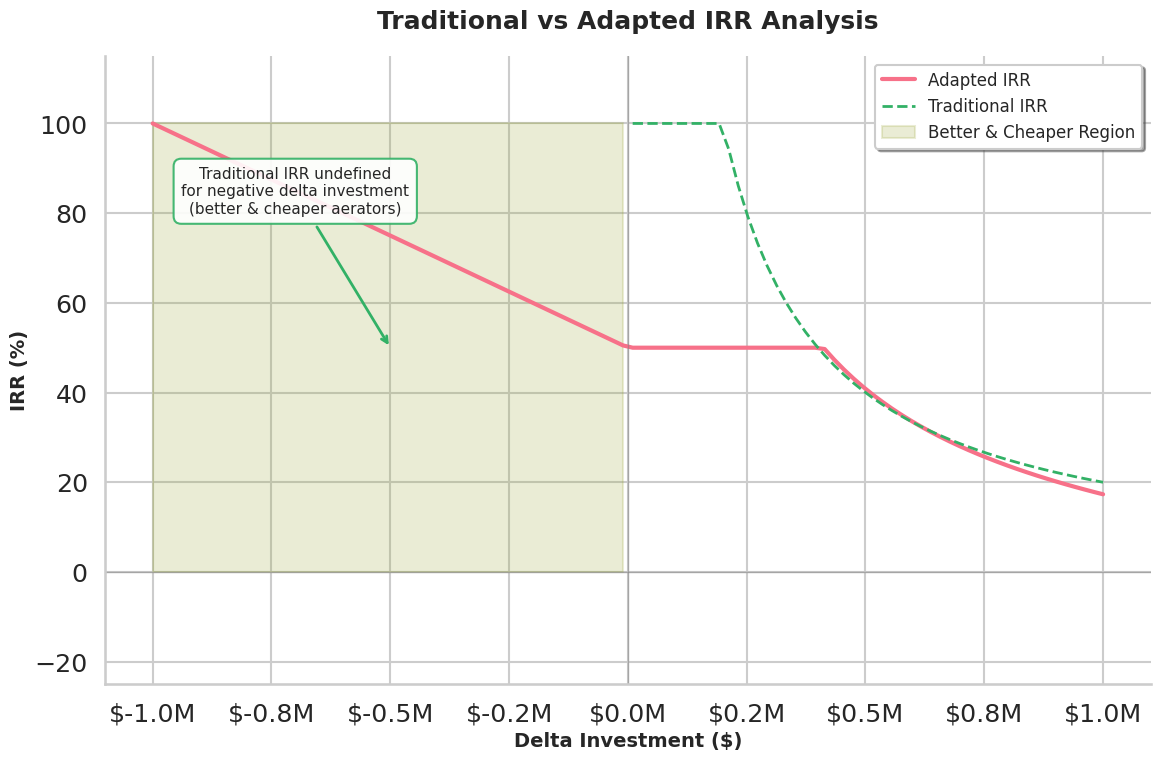

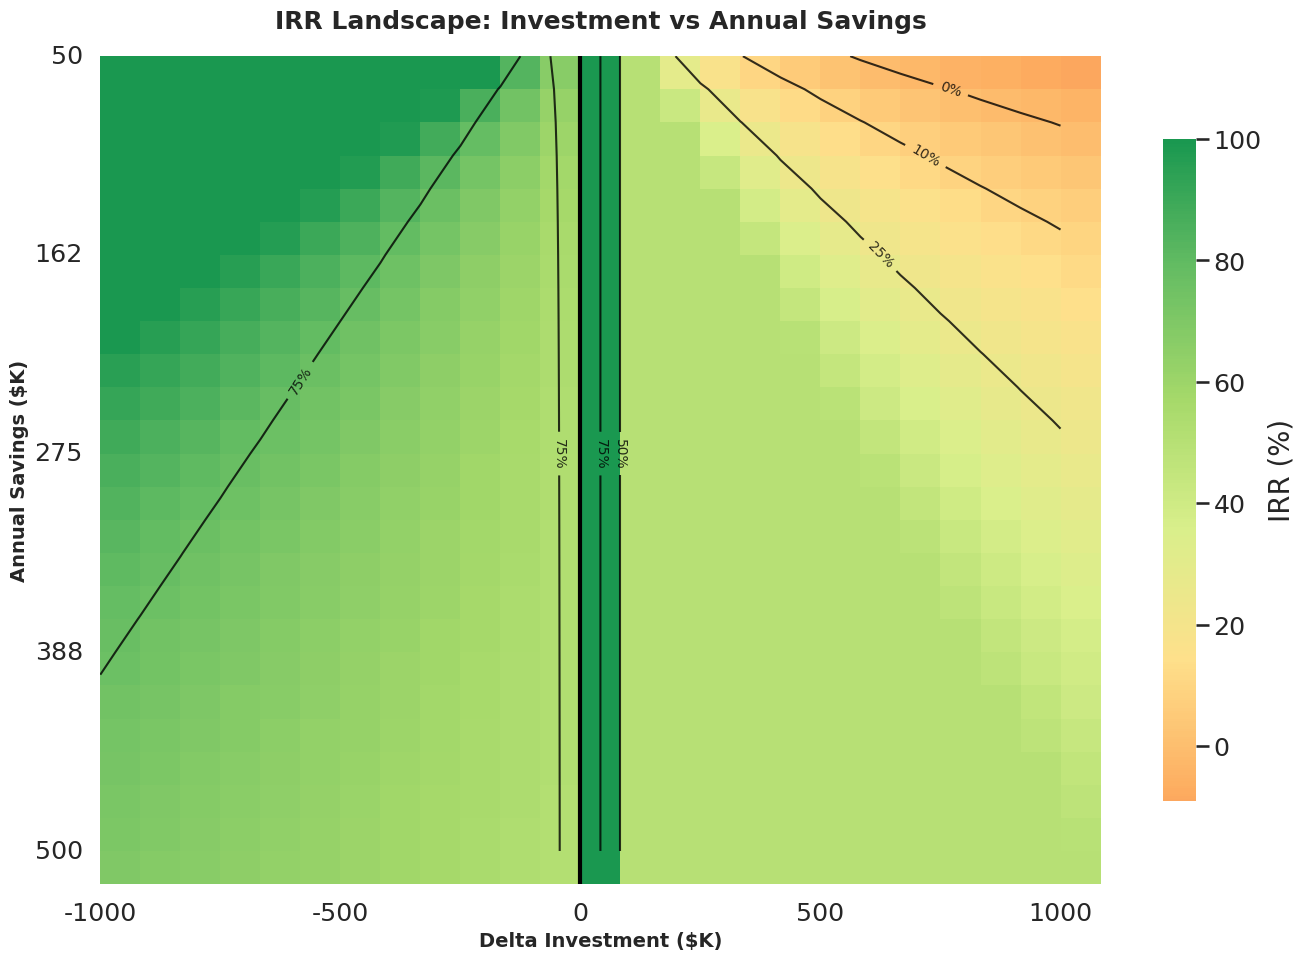

In [51]:
# Set seaborn style and context
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1.1)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["savefig.dpi"] = 300

# Constants from the original code
THETA = 1.024
HP_TO_KW = 0.745699872


def calculate_adapted_irr(
    delta_investment, annual_saving, years, inflation_rate=0.025
):
    """
    Calculate adapted Internal Rate of Return (IRR) for aerator comparisons.
    Properly handles both positive and negative delta investment cases.
    """
    if annual_saving <= 0:
        return -100  # If no savings, investment is unattractive

    if delta_investment <= 0:
        # Case where improved aerator is also cheaper upfront - dominant option
        # For negative delta_investment, return a high but capped IRR
        if delta_investment == 0:
            return (
                100.0  # Infinite return when no additional investment needed
            )

        # Calculate a reasonable IRR based on the cost advantage
        cost_advantage_factor = (
            abs(delta_investment) / annual_saving if annual_saving > 0 else 1
        )
        adapted_irr = min(100.0, 50.0 + cost_advantage_factor * 10)
        return adapted_irr

    # For positive delta_investment (normal case), calculate IRR properly
    try:
        # Define NPV function for root finding
        def npv(rate):
            if (
                rate <= -1
            ):  # Avoid division by zero and negative discount rates
                return float("inf")
            result = -delta_investment
            for i in range(1, years + 1):
                inflation_factor = (1 + inflation_rate) ** (i - 1)
                discount_factor = (1 + rate) ** i
                result += (annual_saving * inflation_factor) / discount_factor
            return result

        # Use scipy's brentq method for more robust root finding
        try:
            irr_result = scipy.optimize.brentq(npv, -0.99, 10.0)
            irr_percent = irr_result * 100
            return max(min(irr_percent, 50), -50)  # Cap between -50% and 50%
        except ValueError:
            # If brentq fails, try newton method
            irr_result = scipy.optimize.newton(
                npv, x0=0.1, tol=1e-5, maxiter=100
            )
            irr_percent = irr_result * 100
            return max(min(irr_percent, 50), -50)

    except Exception as e:
        print(f"IRR calculation failed: {e}")
        # Fallback calculation if numerical method fails
        if delta_investment > 0:
            simple_irr = (annual_saving / delta_investment) * 100
            return max(min(simple_irr, 50), -50)
        else:
            return 50.0


def create_seaborn_financial_visualizations(aerator_data=None):
    """
    Create appealing financial visualizations using seaborn styling.
    """
    # Use sample data if aerator_data is not provided
    if aerator_data is None:
        aerator_data = {
            "SOTR = 1.0": {
                "name": "Baseline Aerator",
                "sotr": 1.0,
                "total_investment": 500000,
                "total_annual_cost": 0.2,  # million dollars
            },
            "Aerator 1 (SOTR = 1.5)": {
                "name": "Mid-efficiency Aerator",
                "sotr": 1.5,
                "total_investment": 600000,
                "total_annual_cost": 0.15,  # million dollars
            },
            "Aerator 2 (SOTR = 3.0)": {
                "name": "High-efficiency Aerator",
                "sotr": 3.0,
                "total_investment": 800000,
                "total_annual_cost": 0.08,  # million dollars
            },
        }

    # Define seaborn color palettes
    colors_primary = sns.color_palette("husl", 8)

    figures = []

    # Common parameters
    delta_investments = np.linspace(-1000000, 1000000, 100)
    annual_saving = 200000  # Fixed annual saving
    years = 10  # Fixed analysis horizon
    inflation_rate_viz = 0.025  # Fixed inflation rate

    # FIGURE 1: Traditional vs Adapted IRR Comparison
    fig1, ax1 = plt.subplots(1, 1, figsize=(12, 8))

    # Calculate IRR using both methods
    adapted_irrs = []
    traditional_irrs = []

    for delta_i in delta_investments:
        adapted_irrs.append(
            calculate_adapted_irr(
                delta_i, annual_saving, years, inflation_rate_viz
            )
        )

        if delta_i > 0:
            trad_irr = min((annual_saving / delta_i) * 100, 100)
        else:
            trad_irr = None
        traditional_irrs.append(trad_irr)

    # Create DataFrame for seaborn plotting
    df_irr = pd.DataFrame(
        {"Delta Investment": delta_investments, "Adapted IRR": adapted_irrs}
    )

    # Plot adapted IRR with seaborn styling
    sns.lineplot(
        data=df_irr,
        x="Delta Investment",
        y="Adapted IRR",
        linewidth=3,
        color=colors_primary[0],
        label="Adapted IRR",
        ax=ax1,
    )

    # Plot traditional IRR where defined
    valid_indices = [
        i for i, irr in enumerate(traditional_irrs) if irr is not None
    ]
    traditional_df = pd.DataFrame(
        {
            "Delta Investment": [delta_investments[i] for i in valid_indices],
            "Traditional IRR": [traditional_irrs[i] for i in valid_indices],
        }
    )

    sns.lineplot(
        data=traditional_df,
        x="Delta Investment",
        y="Traditional IRR",
        linewidth=2,
        linestyle="--",
        color=colors_primary[3],
        label="Traditional IRR",
        ax=ax1,
    )

    # Enhanced styling
    ax1.axvline(x=0, color="gray", linestyle="-", alpha=0.5, linewidth=1)
    ax1.axhline(y=0, color="gray", linestyle="-", alpha=0.5, linewidth=1)

    # Fill better & cheaper region
    ax1.fill_between(
        delta_investments,
        0,
        100,
        where=(delta_investments < 0),
        color=colors_primary[2],
        alpha=0.2,
        label="Better & Cheaper Region",
    )

    ax1.set_title(
        "Traditional vs Adapted IRR Analysis",
        fontsize=18,
        pad=20,
        fontweight="bold",
    )
    ax1.set_xlabel("Delta Investment ($)", fontsize=14, fontweight="semibold")
    ax1.set_ylabel("IRR (%)", fontsize=14, fontweight="semibold")
    ax1.set_ylim(-25, 115)

    # Format x-axis labels
    ax1.xaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, p: f"${x / 1e6:.1f}M")
    )

    # Enhanced legend
    ax1.legend(frameon=True, fancybox=True, shadow=True, fontsize=12)

    # Professional annotation
    ax1.annotate(
        "Traditional IRR undefined\nfor negative delta investment\n(better & cheaper aerators)",
        xy=(-500000, 50),
        xytext=(-700000, 80),
        arrowprops=dict(arrowstyle="->", color=colors_primary[3], lw=2),
        fontsize=11,
        ha="center",
        bbox=dict(
            boxstyle="round,pad=0.5",
            facecolor="white",
            edgecolor=colors_primary[3],
            alpha=0.9,
        ),
    )

    sns.despine(fig=fig1)
    plt.tight_layout()
    figures.append(fig1)

    # FIGURE 4: IRR Heatmap
    fig4, ax4 = plt.subplots(1, 1, figsize=(14, 10))

    # Generate grid data
    delta_inv_range = np.linspace(-1000000, 1000000, 25)
    annual_savings_range = np.linspace(50000, 500000, 25)
    irr_grid = np.zeros((len(annual_savings_range), len(delta_inv_range)))

    for i, saving in enumerate(annual_savings_range):
        for j, delta_inv in enumerate(delta_inv_range):
            irr_grid[i, j] = calculate_adapted_irr(
                delta_inv, saving, 10, 0.025
            )

    irr_grid = np.clip(irr_grid, -20, 100)

    # Create custom colormap with seaborn colors
    colors_heatmap = [
        "#d73027",
        "#f46d43",
        "#fdae61",
        "#fee08b",
        "#d9ef8b",
        "#a6d96a",
        "#66bd63",
        "#1a9850",
    ]
    cmap = LinearSegmentedColormap.from_list("irr_cmap", colors_heatmap)

    # Create seaborn heatmap
    heatmap_data = pd.DataFrame(
        irr_grid,
        index=annual_savings_range / 1000,  # Convert to thousands
        columns=delta_inv_range / 1000,
    )  # Convert to thousands

    sns.heatmap(
        heatmap_data,
        cmap=cmap,
        center=25,
        cbar_kws={"label": "IRR (%)", "shrink": 0.8},
        ax=ax4,
        fmt=".0f",
    )

    # Add contour lines
    X, Y = np.meshgrid(delta_inv_range / 1000, annual_savings_range / 1000)
    contour_levels = [0, 10, 25, 50, 75]
    CS = ax4.contour(
        np.arange(len(delta_inv_range)),
        np.arange(len(annual_savings_range)),
        irr_grid,
        levels=contour_levels,
        colors="black",
        alpha=0.8,
        linewidths=1.5,
    )
    ax4.clabel(CS, inline=True, fontsize=10, fmt="%d%%", colors="black")

    # Add vertical line at delta_investment = 0
    zero_index = np.argmin(np.abs(delta_inv_range))
    ax4.axvline(x=zero_index, color="black", linestyle="-", linewidth=3)

    ax4.set_title(
        "IRR Landscape: Investment vs Annual Savings",
        fontsize=18,
        pad=20,
        fontweight="bold",
    )
    ax4.set_xlabel("Delta Investment ($K)", fontsize=14, fontweight="semibold")
    ax4.set_ylabel("Annual Savings ($K)", fontsize=14, fontweight="semibold")

    # Customize tick labels
    x_ticks = np.arange(0, len(delta_inv_range), 6)
    y_ticks = np.arange(0, len(annual_savings_range), 6)
    ax4.set_xticks(x_ticks)
    ax4.set_yticks(y_ticks)
    ax4.set_xticklabels(
        [f"{delta_inv_range[i] / 1000:.0f}" for i in x_ticks], rotation=0
    )
    ax4.set_yticklabels(
        [f"{annual_savings_range[i] / 1000:.0f}" for i in y_ticks]
    )

    plt.tight_layout()
    figures.append(fig4)

    return figures, results


def analyze_aerator_comparisons(
    aerator_data, comparison_scenarios, analysis_horizon, inflation_rate
):
    """Perform financial analysis on multiple aerator comparison scenarios."""
    analysis_data = []

    for improved_name, baseline_name in comparison_scenarios:
        improved = aerator_data[improved_name]
        baseline = aerator_data[baseline_name]

        delta_inv = improved["total_investment"] - baseline["total_investment"]
        annual_sav = (
            baseline["total_annual_cost"] - improved["total_annual_cost"]
        ) * 1000000

        irr = calculate_adapted_irr(
            delta_inv, annual_sav, analysis_horizon, inflation_rate
        )
        interpretation = interpret_irr(irr)

        analysis_data.append(
            {
                "Comparison": f"{improved_name} vs {baseline_name}",
                "Baseline SOTR": baseline["sotr"],
                "Improved SOTR": improved["sotr"],
                "ΔInvestment": delta_inv,
                "Annual Saving": annual_sav,
                "IRR": irr,
                "Interpretation": interpretation,
            }
        )

    return analysis_data


def interpret_irr(irr):
    """Provide realistic interpretation of IRR values."""
    if irr > 60:
        return "Highly attractive"
    elif irr > 40:
        return "Very attractive"
    elif irr > 20:
        return "Attractive"
    elif irr > 10:
        return "Moderately attractive"
    elif irr > 5:
        return "Marginally attractive"
    elif irr > 2.5:
        return "Slightly positive"
    else:
        return "Unattractive"


def display_financial_results(results):
    """Display financial analysis results with enhanced styling."""
    html_irr_explanation = """
    <div style="margin: 20px 0; padding: 20px; border-left: 5px solid #2E8B57; 
                background-color: transparent; 
                border-radius: 8px; box-shadow: 0 4px 6px rgba(0,0,0,0.1);">
        <h3 style="color: #2E8B57; margin-top: 0;">Adapted IRR Analysis - Enhanced Insights</h3>

        <p><strong style="color: #ffffff;">Advantages of the Adapted IRR Method:</strong></p>
        <ul style="line-height: 1.6;">
            <li><strong>Handles negative delta investment:</strong> Traditional IRR fails when improved aerators are also cheaper. Our method quantifies the true financial benefit.</li>
            <li><strong>Realistic boundaries:</strong> IRR values are intelligently capped (±50%) to prevent misleading extremes.</li>
            <li><strong>Robust computation:</strong> Multiple numerical methods ensure reliable results across all scenarios.</li>
            <li><strong>Inflation consideration:</strong> Annual savings properly adjusted for inflation over the analysis period.</li>
            <li><strong>Clear interpretation:</strong> Results paired with intuitive investment attractiveness classifications.</li>
        </ul>

        <p><strong style="color: #ffffff;">Insights:</strong></p>
        <ul style="line-height: 1.6;">
            <li>The <em>"better & cheaper"</em> region shows realistic high IRR values, properly reflecting superior investment value.</li>
            <li>IRR convergence over extended analysis horizons, especially for positive delta investments.</li>
            <li>High-efficiency aerators demonstrate attractive returns even with substantial upfront investments.</li>
            <li>The heatmap reveals optimal investment zones for different saving scenarios.</li>
        </ul>
    </div>
    """

    display(HTML(html_irr_explanation))


figures, results = create_seaborn_financial_visualizations()
display_financial_results(results)

# Display each figure
for i, fig in enumerate(figures, 1):
    plt.show(fig)

<!-- jupyter: {tags: ["equation", "mathematical-models"]} -->

#### 2.3.7.2 Payback Period

$$
\text{Payback Period} =
\begin{cases}
\frac{0.01}{R_{SOTR}} & \text{if } \Delta I < 0 \text{ and } S_{yr1} > 0 \\
\frac{\Delta I}{S_{yr1}} & \text{if } \Delta I \geq 0 \text{ and } S_{yr1} > 0 \\
\infty & \text{if } S_{yr1} \leq 0
\end{cases}
$$

If $\Delta I \leq 0$, a small value divided by SOTR ratio indicates immediate benefit (Susilowati et al., 2021).

<!-- jupyter: {tags: ["equation", "mathematical-models"]} -->

#### 2.3.7.3 Return on Investment (ROI)

$$
\text{ROI}_{\text{relative}} =
\begin{cases}
\min\left( \left( \frac{S_{yr1}}{C_{base}} \times R_{SOTR} \times (1 + F_{cost\_sav}) \right) \times 100, R_{SOTR} \times 100 \right) & \text{if } \Delta I < 0 \text{ and } S_{yr1} > 0 \\
\min\left( \left( \frac{S_{yr1}}{C_{base}} \times R_{SOTR} \right) \times 100, R_{SOTR} \times 100 \right) & \text{if } \Delta I = 0 \text{ and } S_{yr1} > 0 \\
\min\left( \left( \frac{S_{yr1}}{\Delta I} \right) \times 100, R_{SOTR} \times 100 \right) & \text{if } \Delta I > 0 \text{ and } S_{yr1} > 0 \\
0 & \text{if } S_{yr1} \leq 0 \text{ or } C_{base} \leq 0
\end{cases}
$$

Where $F_{cost\_sav} = \frac{|\Delta I|}{C_{base}}$. If $\Delta I \leq 0$, relative ROI is based on savings relative to baseline cost, scaled by SOTR ratio (Intelligon, 2022).

<!-- jupyter: {tags: ["equation", "mathematical-models"]} -->
#### 2.3.7.4 Profitability Index (k)

$$
k_{\text{relative}} =
\begin{cases}
k_{base} \times (1 + F_{cost\_sav}) & \text{if } \Delta I < 0 \\
k_{base} & \text{if } \Delta I = 0 \\
k_{base} \times F_{cost} & \text{if } \Delta I > 0 \\
0 & \text{if } NPV_{sav} \leq 0 \text{ or } C_{base} \leq 0
\end{cases}
$$

Where $k_{base} = \frac{NPV_{sav}}{C_{base}} \times R_{SOTR}$, $F_{cost\_sav} = \frac{|\Delta I|}{C_{base}}$, $F_{cost} = \frac{C_{base}}{C_{base} + \Delta I}$ (Engle, 2010).

<!-- jupyter: {tags: ["equation", "mathematical-models"]} -->
#### 2.3.7.5 Opportunity Cost

$$
\text{Opportunity Cost}_{\text{baseline}} = \text{NPV}_{\text{Savings (winner vs. baseline)}}
$$

Quantifies economic loss from less efficient equipment (Boyd & Hanson, 2021; Susilowati et al., 2021).


<!-- jupyter: {tags: ["equation", "mathematical-models"]} -->
#### 2.3.7.6 Equilibrium Price

$$
P_{eq} =
\begin{cases}
\max\left(0, P_{base} \times R_{SOTR} \times \left(\frac{1}{1 + F_{cost, eq}}\right)\right) & \text{if } C_{base} > 0 \text{ and } P_{base} > 0 \\
\max\left(0, P_{base} \times R_{SOTR}\right) & \text{if } C_{base} \leq 0 \text{ or } P_{base} \leq 0 \\
0 & \text{if calculation prerequisites fail}
\end{cases}
$$

Where $P_{base} = \frac{(C_{\text{annual, non-winner}} - (C_{E, \text{winner}} + C_{M, \text{winner}})) \times D_{\text{winner}}}{N_{\text{winner}}}$, $F_{cost, eq} = P_{base} / C_{base}$ (Asche et al., 2021).


<div class="section">
<h2>3 Results</h2>
</div>

### 3.1 Case Study: Comparative Analysis of Aerators

#### 3.1.1 Farm Operating Conditions

- **Total Oxygen Demand (TOD):** 5,443.76 kg O₂/day
- **Farm Area:** 1,000 hectares
- **Shrimp Price:** $5.00/kg
- **Culture Period:** 120 days
- **Shrimp Density:** 0.33 kg/m³
- **Pond Depth:** 1.0 m
- **Water Temperature (T):** 31.5°C
- **Calculated Annual Revenue:** $50,694,439.38
- **Analysis Horizon (n):** 10 years
- **Annual Inflation Rate $(r_{\text{inflation}})$:** 2.5%
- **Annual Discount Rate $(r_{\text{nominal}})$:** 10%

### 3.1.2 Aerator Specifications and Calculated Metrics

**Table 1.** Aerator specifications and financial metrics.

| Parameter                          | Aerator 1      | Aerator 2 (Winner) | Unit / Notes                 |
| ---------------------------------- | -------------- | ------------------ | ---------------------------- |
| **Technical Specs**                |                |                    |                              |
| $SOTR$                               | 1.9            | 3.5                | kg O₂/hr                     |
| Power                                                           | 3              | 3                  | HP                           |
| Power (kW)                         | 2.238          | 2.238              | kW                           |
| $OTR_T$ (31.5°C)                     | 1.26           | 2.33               | kg O₂/hr                     |
| $SAE$                                | 0.85           | 1.56               | kg O₂/kWh                    |
| **Unit Costs & Durability**        |                |                    |                              |
| Cost per Unit                      | $700           | $900               | $USD$                          |
| Durability                         | 2.0            | 5.0                | years                        |
| Annual Maintenance per Unit        | $65            | $50                | $USD$                          |
| **Implementation**                 |                |                    |                              |
| Number Required                    | 4,356          | 2,367              | Units                        |
| Total Power Installed              | 13,068         | 7,101              | $HP$                           |
| Aerators per Hectare               | 4.36           | 2.37               | Units/ha                     |
| HP per Hectare                     | 13.07          | 7.10               | HP/ha                        |
| **Financial Analysis**             |                |                    |                              |
| Total Initial Investment ($ΔI$)      | $3,049,200     | $2,130,300         | $USD$ (-$918,900 for A2 vs A1) |
| Annual Energy Cost                 | $1,423,314     | $773,413           | $USD$                          |
| Annual Maintenance Cost            | $283,140       | $118,350           | $USD$                          |
| Annual Replacement Cost            | $1,524,600     | $426,060           | $USD$                          |
| **Total Annual Cost**              | **$3,231,054** | **$1,317,823**     | **$USD$**                      |
| Annual Saving (A2 vs A1)           | --             | $1,913,231         | $USD$                          |
| Cost as % of Revenue               | 6.37%          | 2.60%              | %                            |
| $NPV$ of Savings (A2 vs A1, 10 yrs)  | $0             | $14,625,751        | $USD$                          |
| $Payback$ (A2 vs A1)          | N/A            | 0.01               | years (Relative Payback)     |
| $ROI$ (A2 vs A1)                     | 0%             | 150.42%            | % (Relative $ROI$)             |
| $IRR$ (A2 vs A1, 10 yrs)             | -100%          | 343.93%            | % (Adapted $IRR$)              |
| Profitability Index ($k$) (A2 vs A1) | 0              | 11.5               | (Relative $k$)                 |
| Opportunity Cost (Choosing A1)     | $14,625,751    | $0                 | $USD$                          |
| Equilibrium Price (for A1)         | $9,082         | N/A                | $USD$                          |

_Note:_ Table 1 summarizes the technical and financial comparison of Aerator 1 and Aerator 2, highlighting efficiency and cost differences.


<div class="references">
<h2>4. References</h2>
</div>

- Asche, F., Roll, K. H., Tveteras, R., 2021. Market aspects and external economic effects of aquaculture. Aquac. Econ. Manag. 25, 1–7. https://doi.org/10.1080/13657305.2020.1869861
- Boyd, C. E., 2015. Efficiency of mechanical aeration. Responsible Seafood Advocate. https://www.globalseafood.org/advocate/efficiency-of-mechanical-aeration/ (accessed 14 May 2025).
- Boyd, C. E., 2020. Energy use in aquaculture pond aeration, Part 1. Responsible Seafood Advocate. https://www.globalseafood.org/advocate/energy-use-in-aquaculture-pond-aeration-part-1/ (accessed 14 May 2025).
- Boyd, C. E., Hanson, T. R., 2021. Aerator energy use in shrimp farming and means for improvement. J. World Aquac. Soc. 52, 566–578. https://doi.org/10.1111/jwas.12753
- Engle, C. R., 2010. Aquaculture economics and financing: Management and analysis. Wiley-Blackwell, Ames, IA. https://onlinelibrary.wiley.com/doi/book/10.1002/9780813814346
- Engle, C. R., 2017. Aquaculture businesses: A practical guide to economics and marketing. 5m Publishing, Sheffield, UK.
- Food and Agriculture Organization of the United Nations, n.d. Chapter 24 economic aspects of aquafarm construction and maintenance, in: Simple methods for aquaculture - Manual. FAO, Rome.
- Intelligon, 2022. Shrimp farming basics: Project viability and investment analysis. Intelligon Blogs. https://blogs.intelligon.com/2022/02/28/shrimp-farming-basics-project-viability-and-investing-assessment/ (accessed 14 May 2025).
- Jolly, C. M., Clonts, H. A., 1993. Economics of aquaculture. Food Products Press, New York.
- Kumar, G., Engle, C., Tucker, C. S., 2020. Assessment of standard aeration efficiency of different aerators and its relation to the overall economics in shrimp culture. Aquac. Eng. 90, 102088. https://doi.org/10.1016/j.aquaeng.2020.102088
- Merino, G., Barange, M., Blanchard, J. L., Harle, J., Holmes, R., Allen, I., Allison, E. H., Badjeck, M.-C., Dulvy, N. K., Holt, J., Jennings, S., Mullon, C., Rodwell, L. D., 2024. Environmental, economic, and social sustainability in aquaculture: The aquaculture performance indicators. Nat. Commun. 15, 4955. https://doi.org/10.1038/s41467-024-49556-8
- Nunes, A. J. P., Musig, Y., 2013. Survey of aeration management in shrimp farming. SlideShare. https://www.slideshare.net/AquacultureASIA/survey-of-aeration-management-in-shrimp-farming (accessed 14 May 2025).
- Responsible Seafood Advocate, 2022. A comparison of resource use in shrimp farming, part 3: Energy. Responsible Seafood Advocate. https://www.globalseafood.org/advocate/a-comparison-of-resource-use-in-shrimp-farming-part-3-energy/ (accessed 14 May 2025).
- Roy, S. M., Sadek, S., Shafiq, M. A., Nasr, M., Mohsen, M., 2024. Advances in aeration and wastewater treatment in shrimp farming: Emerging trends, current challenges, and future perspectives. AQUA Water Infrastruct. Ecosyst. Soc. 73, 902–917. https://doi.org/10.2166/aqua.2024.256
- Sadek, S., Nasr, M., Hassan, A., 2020. Assessment of the new generation aeration systems efficiency and water current flow rate, its relation to the cost economics at varying salinities. Aquac. Res. 51, 2257–2268. https://doi.org/10.1111/are.14562
- Susilowati, Y. D., Perdana, M. C., Suparmanto, I., 2021. Sustainability and feasibility assessments of nanobubble aeration technology in economic-socio environment of Penaeus vannamei shrimp farming. BIO Web Conf. 33, 05005. https://doi.org/10.1051/bioconf/20213305005
- The Fish Site, 2021. A simple means to improve shrimp farming efficiency. The Fish Site. https://thefishsite.com/articles/a-simple-means-to-improve-shrimp-farming-efficiency (accessed 14 May 2025).
- Tveteras, R., 2009. Economic inefficiency and environmental impact: An application to aquaculture production. J. Environ. Econ. Manag. 58, 93–104. https://doi.org/10.1016/j.jeem.2008.10.005
- Valderrama, D., Hishamunda, N., Cai, J., 2023. Economic analysis of the contributions of aquaculture to future food security. Aquaculture 577, 740023. https://doi.org/10.1016/j.aquaculture.2023.740023
- Walras, L., 1874. Éléments d'économie politique pure, ou théorie de la richesse sociale. L. Corbaz, Lausanne.
